<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: 
initial data for the neural network.
### Hidden Layer: 
intermediate layer between input and output layer and place where all the computation is done
### Output Layer:
produce the result for given inputs
### Neuron:
a neuron is a mathematical function.
a neuron typically computes the weighted average of its input, and this sum is passed through a nonlinear function, often called activation function, such as the sigmoid
### Weight:
Weights are the co-efficients of the equation which you are trying to resolve. 
When a neural network is trained on the training set, it is initialised with a set of weights. These weights are then optimised during the training period and the optimum weights are produced.
### Bias
Bias is simply a constant value (or a constant vector) that is added to the product of inputs and weights. Bias is utilised to offset the result.
The bias is used to shift the result of activation function towards the positive or negative side.
### Activation Function:
the activation function of a node defines the output of that node given an input or set of inputs
In Neural Network the activation function defines if given node should be “activated” or not based on the weighted sum
### Node Map:

### Perceptron:
perceptron is an artificial neuron using the Heaviside step function as the activation function
The most fundamental unit of a  neural network is called an  neuron, which takes an input, processes it, passed it through an activation function like the Sigmoid, return the activated output.

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [126]:
import pandas as pd
import numpy as np

data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [25]:
df.head(10)

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [127]:
##### Your Code Here ####

X= df.drop('y', axis=1)
y = pd.DataFrame(df.y)

In [120]:
y

,y
0,1
1,1
2,1
3,0


In [128]:
def sigmoid(x):
   return 1 / (1 + np.exp(x)) 

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1-sx)

In [131]:
weights = 2 *np.random.random((2,1)) - 1

In [30]:
weights

array([[-0.07436077],
       [ 0.7945542 ]])

In [31]:
weighted_sum = np.dot(X, weights)
weighted_sum

array([[ 0.        ],
       [-0.07436077],
       [ 0.7945542 ],
       [ 0.72019343]])

In [32]:
activated_output = sigmoid(weighted_sum)

In [33]:
activated_output

array([[0.5       ],
       [0.51858163],
       [0.31119163],
       [0.32735039]])

In [35]:
error = y - activated_output
error

,y
0,0.500000
1,0.481418
2,0.688808
3,-0.327350


In [36]:
adjusted = error = sigmoid_derivative(activated_output)
adjusted

array([[0.23500371],
       [0.23391769],
       [0.24404385],
       [0.24342043]])

In [39]:
weights += np.dot(X.T, adjusted)
weights

array([[0.40297735],
       [1.28201848]])

In [132]:
# Update our weights 10,000 times - (fingers crossed that this process reduces error)
for iteration in range(20000):
    
    # Weighted sum of inputs / weights
    weighted_sum = np.dot(X, weights)
    
    # Activate!
    activated_output = sigmoid(weighted_sum)
    
    # Cac error
    error = y - activated_output
    
    adjustments = error * sigmoid_derivative(activated_output)
    
    # Update the Weights
    weights += np.dot(X.T, adjustments)
    
print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)

Weights after training
[[-3930.90275865]
 [-3927.77476087]]
Output after training
[[0.5]
 [1. ]
 [1. ]
 [1. ]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [45]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [111]:
y_data = diabetes['Outcome']
X_data = diabetes.drop('Outcome', axis=1)
X_data.replace('?', -99999, inplace=True)

In [52]:
X_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [10]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = list(diabetes)[:-1]

X = ...

In [108]:
from sklearn import preprocessing

normalized_X = preprocessing.normalize(X_data)
normalized_X_test = preprocessing.normalize(X_test)

In [121]:
class Perceptron(object):
  def __init__(self, rate = 0.01, niter = 10):
    self.rate = rate
    self.niter = niter

  def fit(self, X, y):
    """Fit training data
    X : Training vectors, X.shape : [#samples, #features]
    y : Target values, y.shape : [#samples]
    """

    # weights
    self.weight = np.zeros(1 + X.shape[1])

    # Number of misclassifications
    self.errors = []  # Number of misclassifications

    for i in range(self.niter):
      err = 0
      for xi, target in zip(X, y):
        delta_w = self.rate * (target - self.predict(xi))
        self.weight[1:] += delta_w * xi
        self.weight[0] += delta_w
        err += int(delta_w != 0.0)
      self.errors.append(err)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.weight[1:]) + self.weight[0]

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)

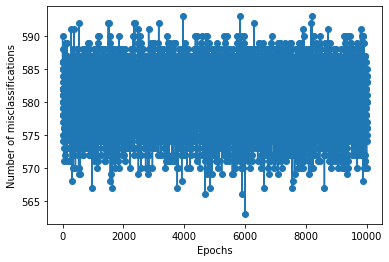

In [124]:
import matplotlib.pyplot as plt

pn = Perceptron(0.1, 10000)
pn.fit(normalized_X, y_data)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [125]:
new_output = pn.predict(normalized_X_test)
new_output

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [123]:
y_test

,Outcome
668,0
324,0
624,0
690,0
473,0
...,...
355,1
534,0
344,0
296,1


## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?